In [1]:
import sys
sys.path.insert(1, '/data/user/012245/projects')
from multifactor.snippet.NCP import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from multifactor.backtest.report_generator import legend_helper
plt.style.use('default')



In [2]:
%matplotlib inline

In [3]:
data, cs_data = ut.diller(db_path)

In [15]:
target_date = pd.Timestamp.now().date() - pd.Timedelta('1D')
death_rate = 0.03

In [5]:
exclude_list = ['China', 'HuBei', 'WuHan']

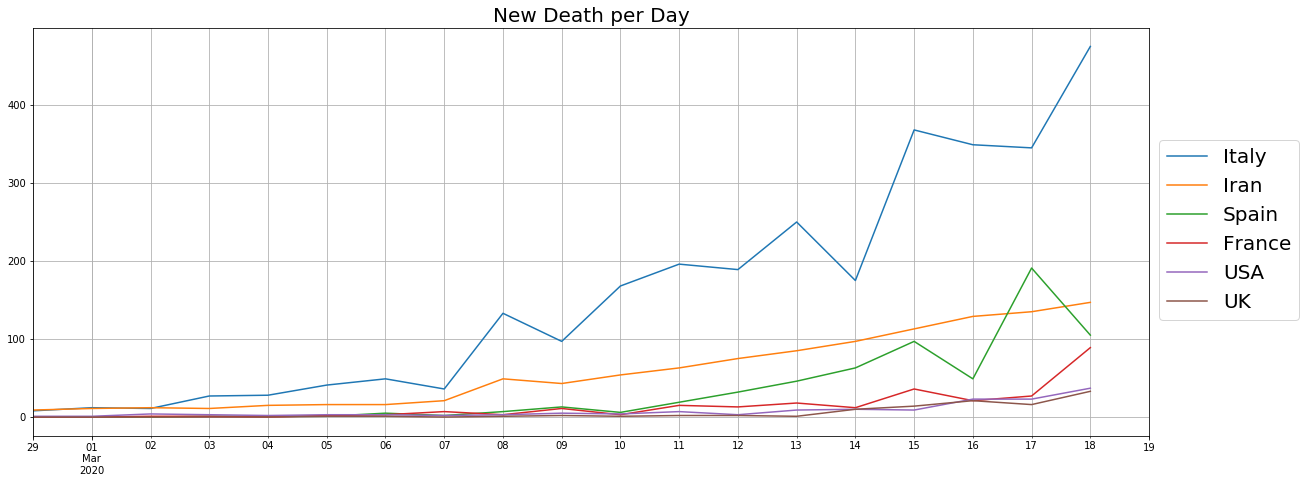

In [6]:
death_top_list = cs_data['death']['new'].loc[target_date].drop(exclude_list).sort_values(ascending=False).head(6).index
cs_data['death']['new'][death_top_list].tail(20).plot(figsize=(20, 7.5))
plt.title('New Death per Day', fontsize=20)
plt.legend(fontsize=20, bbox_to_anchor=(1, 0.75))
plt.grid(True, which='minor', axis='both')
plt.grid(True, which='major', axis='both')

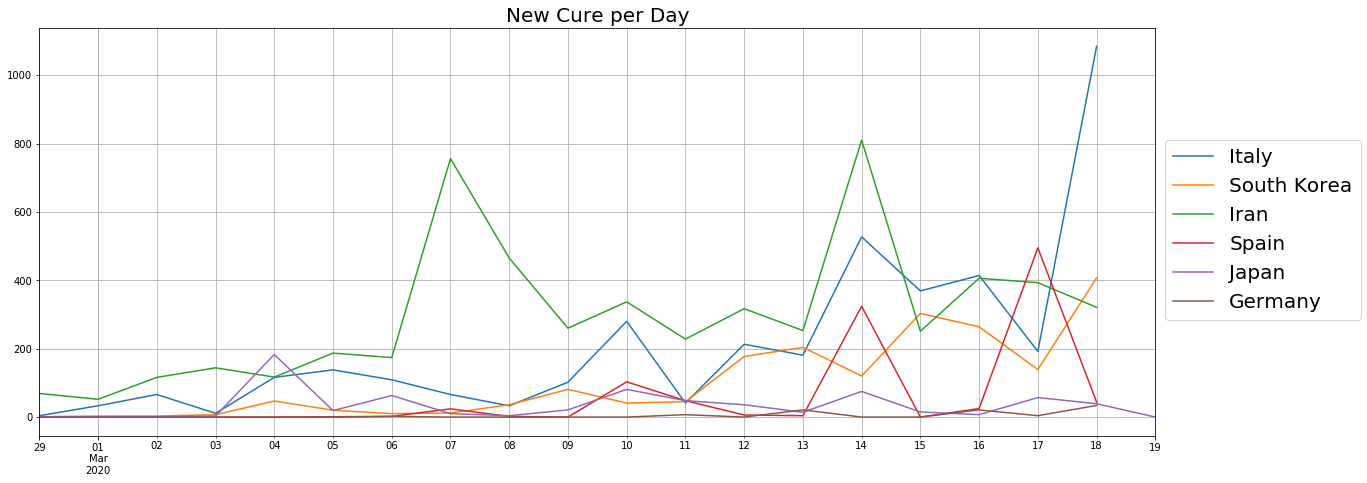

In [7]:
cure_top_list = cs_data['cure']['new'].loc[target_date].drop(exclude_list).sort_values(ascending=False).head(6).index
cs_data['cure']['new'][cure_top_list].tail(20).plot(figsize=(20, 7.5))
plt.title('New Cure per Day', fontsize=20)
plt.legend(fontsize=20, bbox_to_anchor=(1, 0.75))
plt.grid(True, which='minor', axis='both')
plt.grid(True, which='major', axis='both')


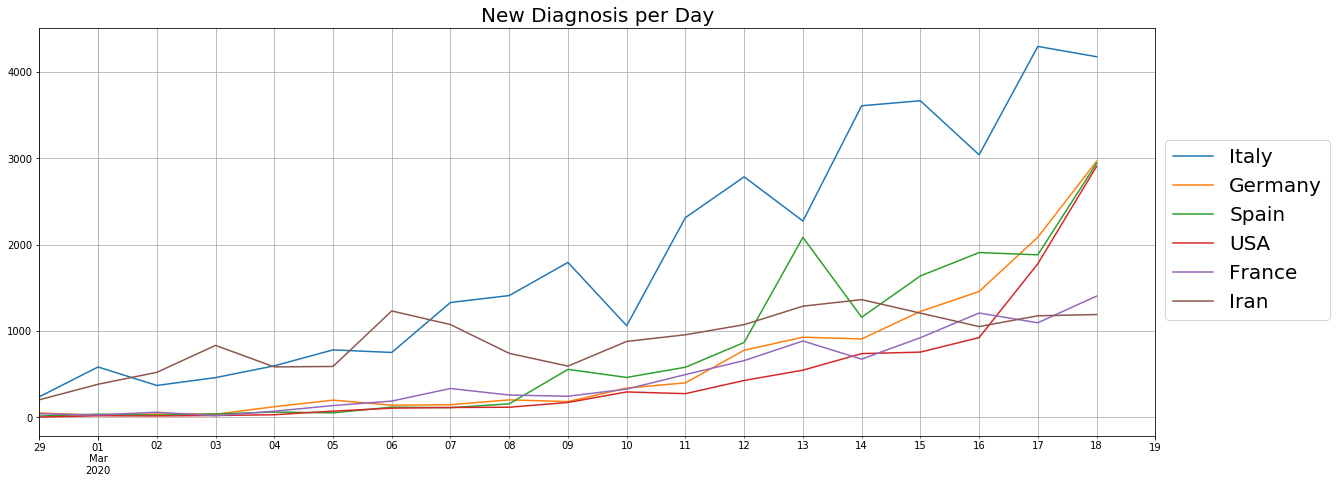

In [8]:
diagnosis_top_list = cs_data['diagnosis']['new'].loc[target_date].drop(exclude_list).sort_values(ascending=False).head(6).index
cs_data['diagnosis']['new'][diagnosis_top_list].tail(20).plot(figsize=(20, 7.5))
plt.title('New Diagnosis per Day', fontsize=20)
plt.legend(fontsize=20, bbox_to_anchor=(1, 0.75))
plt.grid(True, which='minor', axis='both')
plt.grid(True, which='major', axis='both')


In [9]:
population

{'Australia': 24.6,
 'Brazil': 209.3,
 'China': 1386,
 'France': 66.99,
 'Germany': 82.79,
 'HuBei': 58.5,
 'Iran': 81.16,
 'Italy': 60.48,
 'Japan': 126.8,
 'Saudi Arabia': 32.94,
 'South Korea': 51.47,
 'Spain': 46.66,
 'UK': 66.44,
 'USA': 327.2,
 'WuHan': 11.08}

In [18]:
infected_per_thousand = cs_data['death']['cumsum'] / death_rate / population / 1E3

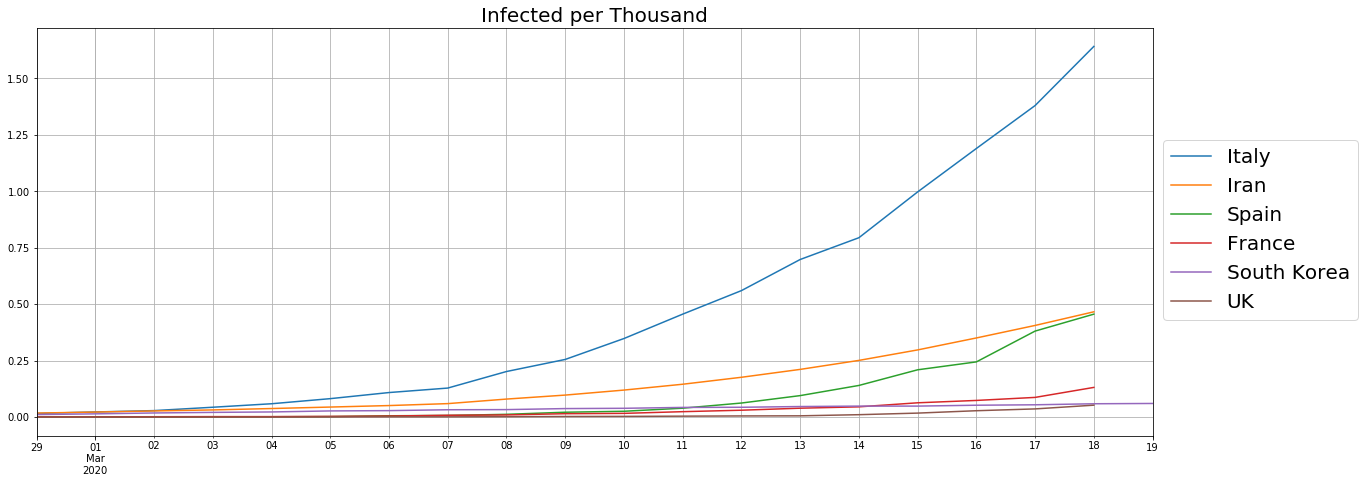

In [24]:
infected_top_list = infected_per_thousand.loc[target_date].drop(exclude_list).sort_values(ascending=False).head(6).index
infected_per_thousand[infected_top_list].tail(20).plot(figsize=(20, 7.5))
plt.title('Infected per Thousand', fontsize=20)
plt.legend(fontsize=20, bbox_to_anchor=(1, 0.75))
plt.grid(True, which='minor', axis='both')
plt.grid(True, which='major', axis='both')

In [27]:
infected_per_thousand.loc[target_date].sort_values(ascending=False)

WuHan           7.509025
HuBei           1.783476
Italy           1.641314
Iran            0.466157
Spain           0.455779
France          0.131363
China           0.078042
South Korea     0.058934
UK              0.052679
USA             0.015485
Germany         0.011274
Japan           0.009989
Australia       0.008130
Brazil          0.000637
Saudi Arabia    0.000000
Name: 2020-03-18 00:00:00, dtype: float64

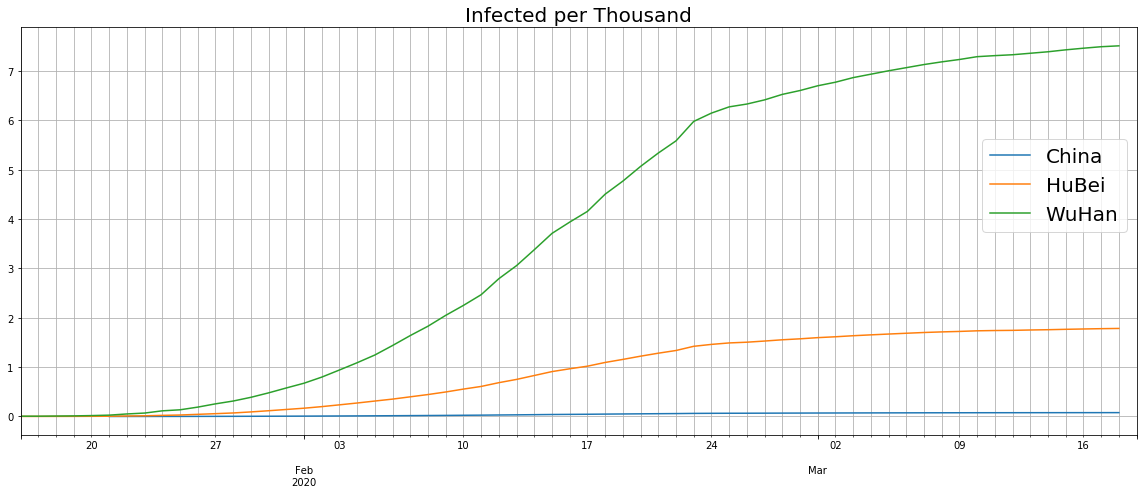

In [26]:
infected_per_thousand[exclude_list].plot(figsize=(20, 7.5))
plt.title('Infected per Thousand', fontsize=20)
plt.legend(fontsize=20, bbox_to_anchor=(1, 0.75))
plt.grid(True, which='minor', axis='both')
plt.grid(True, which='major', axis='both')

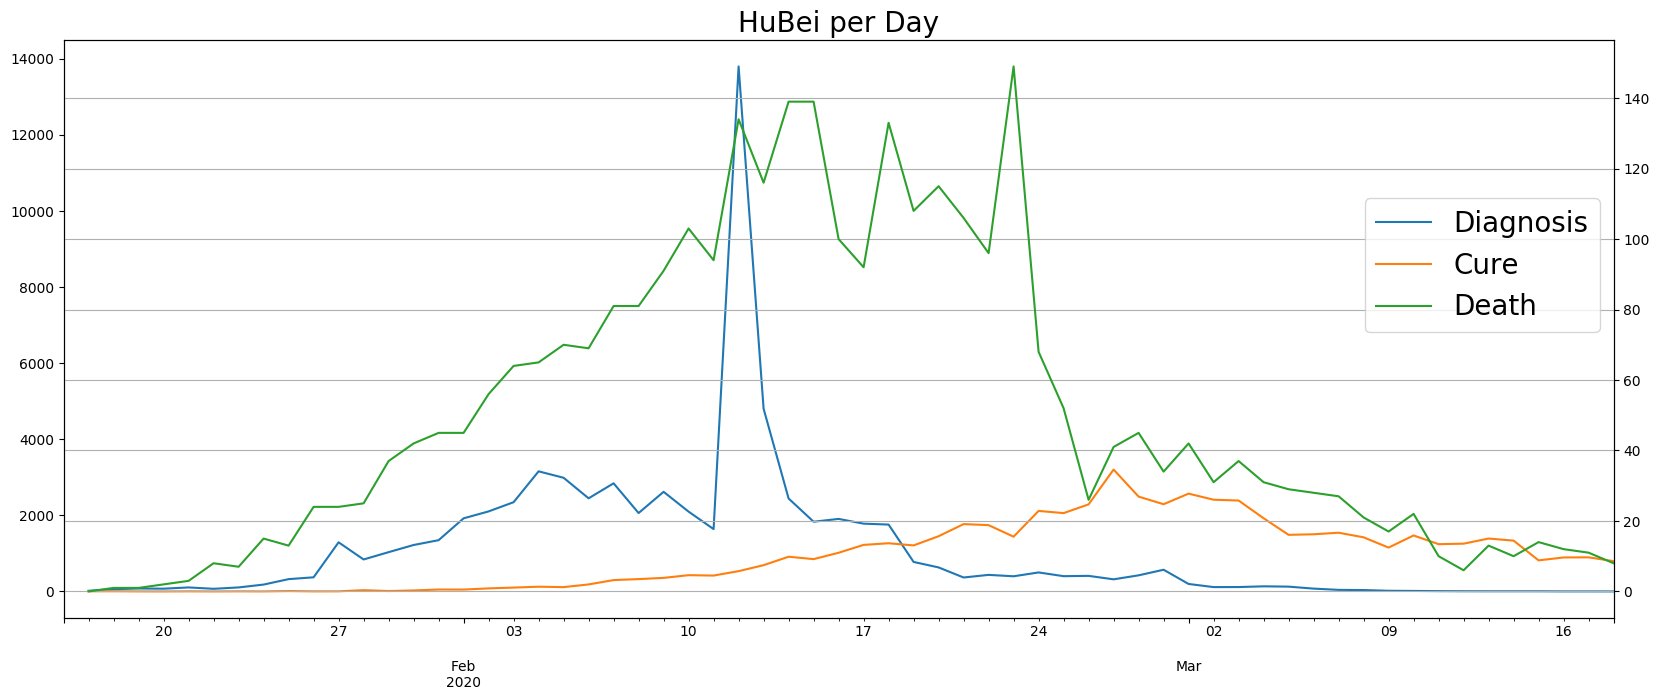

In [45]:
HuBei = pd.concat([data['HuBei']['diagnosis']['new'],
                   data['HuBei']['cure']['new'],
                   data['HuBei']['death']['new']], axis=1)
HuBei.columns = ['Diagnosis', 'Cure', 'Death']
HuBei[['Diagnosis', 'Cure']].plot(figsize=(20, 7.5), legend=False)
HuBei['Death'].plot(secondary_y=True)
plt.title('HuBei per Day', fontsize=20)
plt.legend(*legend_helper(), fontsize=20, bbox_to_anchor=(1, 0.75))
plt.grid(True, which='major', axis='both')
plt.grid(True, which='minor', axis='both')


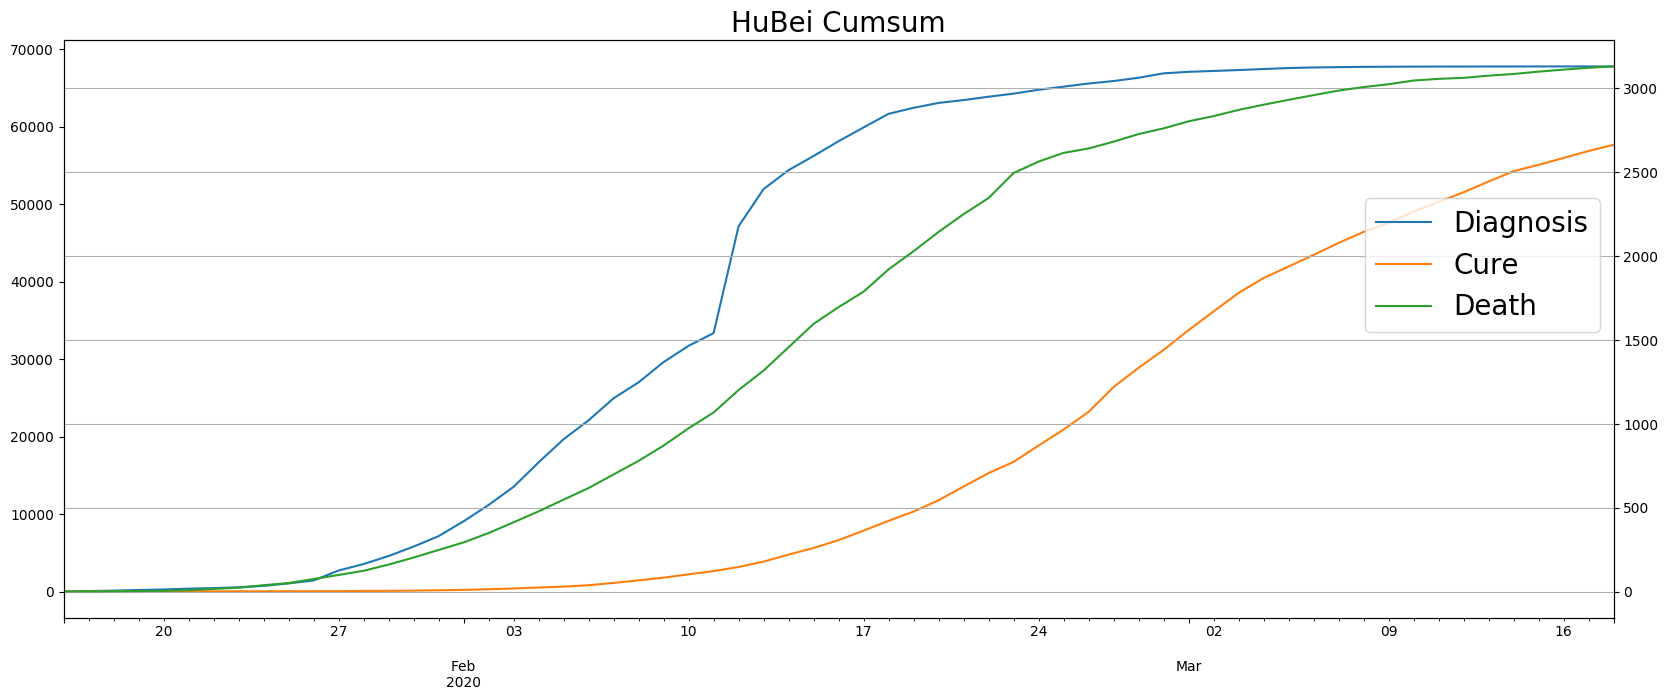

In [43]:
HuBei = pd.concat([data['HuBei']['diagnosis']['cumsum'],
                   data['HuBei']['cure']['cumsum'],
                   data['HuBei']['death']['cumsum']], axis=1)
HuBei.columns = ['Diagnosis', 'Cure', 'Death']
HuBei[['Diagnosis', 'Cure']].plot(figsize=(20, 7.5), legend=False)
HuBei['Death'].plot(secondary_y=True)
plt.title('HuBei Cumsum', fontsize=20)
plt.legend(*legend_helper(), fontsize=20, bbox_to_anchor=(1, 0.75))
plt.grid(True, which='major', axis='both')
plt.grid(True, which='minor', axis='both')


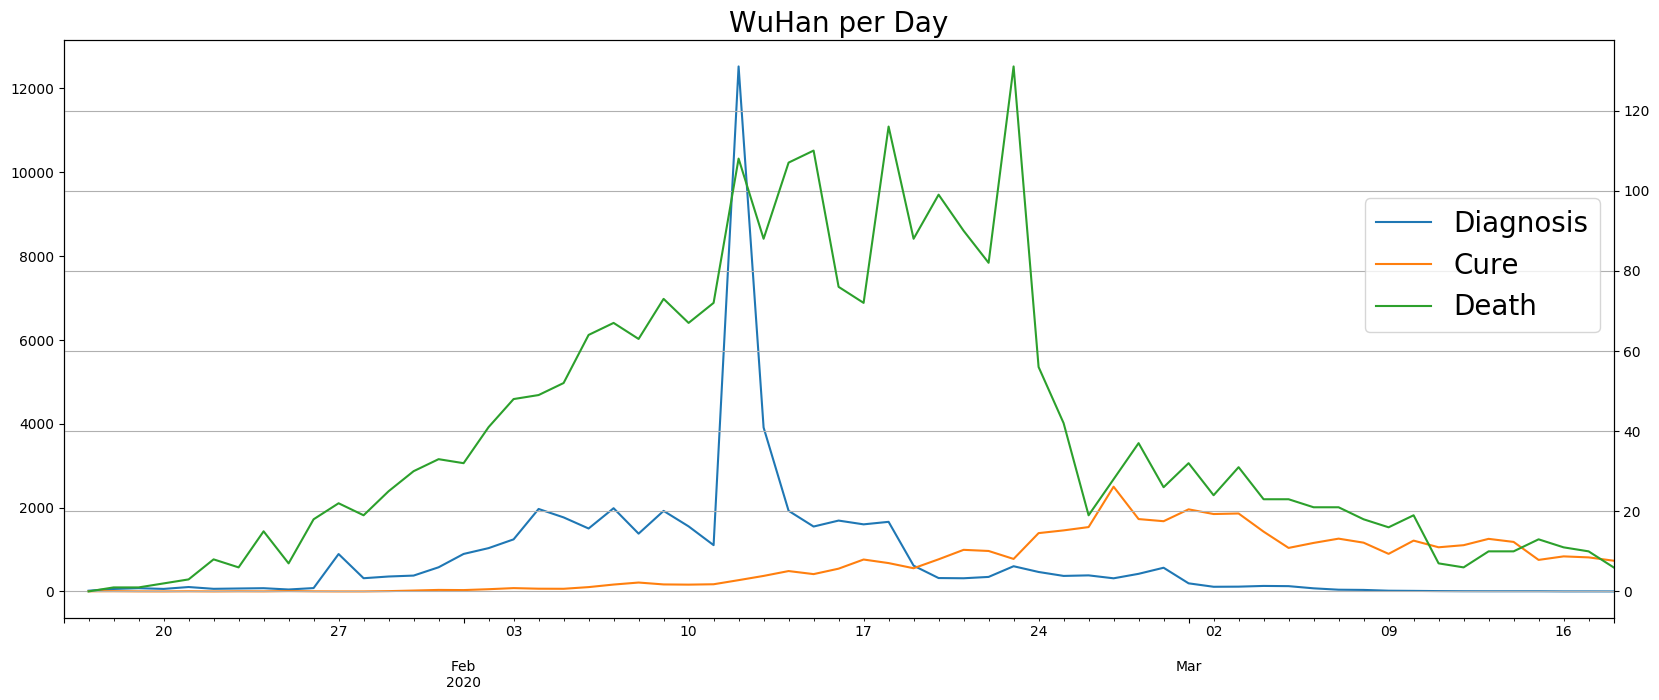

In [46]:
WuHan = pd.concat([data['WuHan']['diagnosis']['new'],
                   data['WuHan']['cure']['new'],
                   data['WuHan']['death']['new']], axis=1)
WuHan.columns = ['Diagnosis', 'Cure', 'Death']
WuHan[['Diagnosis', 'Cure']].plot(figsize=(20, 7.5), legend=False)
WuHan['Death'].plot(secondary_y=True)
plt.title('WuHan per Day', fontsize=20)
plt.legend(*legend_helper(), fontsize=20, bbox_to_anchor=(1, 0.75))
plt.grid(True, which='major', axis='both')
plt.grid(True, which='minor', axis='both')
